# __________QUESTION 4__________

# Preparation des donnees

In [108]:
# charger l'ensemble de donnees adult
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('adult.data', sep=", ", header=None, names=['age', 'workclass', 'weight','education','education years','marital status','occupation','relationship','race','sex','capital gain','capital loss','hours weekly','native country','yearly salary'])
test = pd.read_csv('adult.test', sep=", ", header=None, names=['age', 'workclass', 'weight','education','education years','marital status','occupation','relationship','race','sex','capital gain','capital loss','hours weekly','native country','yearly salary'])

C:\Users\draby\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\draby\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [109]:
# combiner les jeux d'entrainement et de test en un seul ensemble
test = test.loc[1:,:]
data = pd.concat([train,test], axis=0)

In [110]:
# inspecter les types de donnees dans chaque colonne
data.dtypes

age                 object
workclass           object
weight             float64
education           object
education years    float64
marital status      object
occupation          object
relationship        object
race                object
sex                 object
capital gain       float64
capital loss       float64
hours weekly       float64
native country      object
yearly salary       object
dtype: object

In [111]:
# assurer que les donnees d'age soient toutes des int
data.age = pd.to_numeric(data.age, errors='raise', downcast='integer')

In [112]:
# nous allons devoir transformer les caracteristiques age, poids, gain/perte en capitaux et heures de travail en groupes
data.nunique()

age                   74
workclass              9
weight             28523
education             16
education years       16
marital status         7
occupation            15
relationship           6
race                   5
sex                    2
capital gain         123
capital loss          99
hours weekly          96
native country        42
yearly salary          4
dtype: int64

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

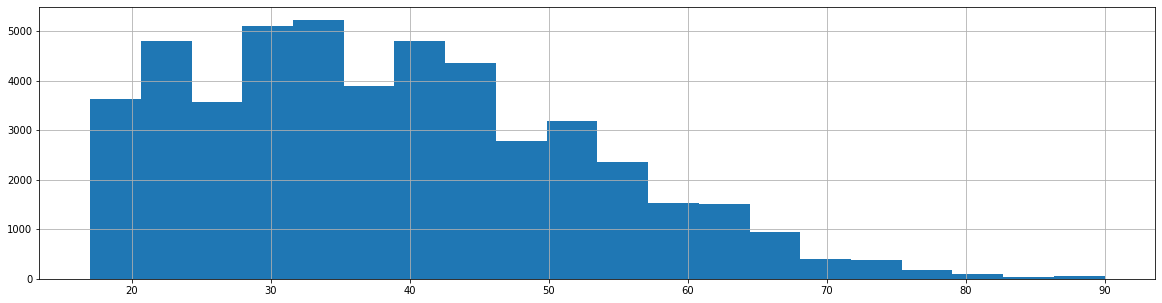

In [113]:
# inspecter la colonne age
data.age.hist(bins = 20)
data.age.describe()

In [114]:
# regrouper les donnees d'age
bins = list(range(15,91,5))
data['age binned'] = pd.cut(data['age'], bins)

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: weight, dtype: float64

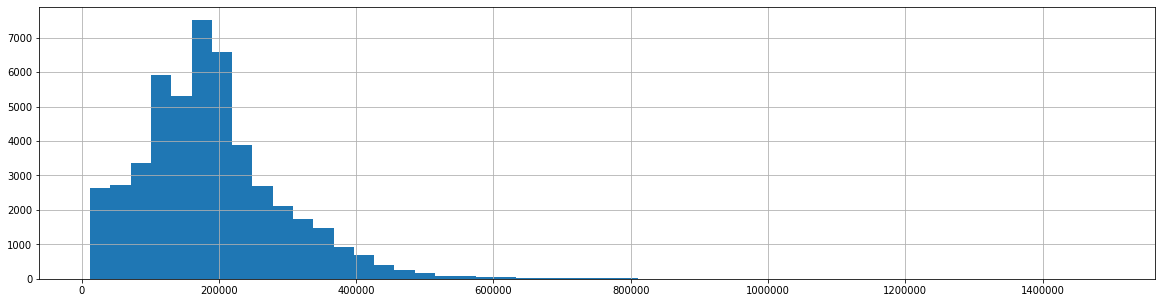

In [115]:
# inspecter la colonne poids
data.weight.hist(bins = 50)
data.weight.describe()

In [116]:
# regrouper les donnees de poids
bins = list(range(0,1500001,100000))
data['weight binned'] = pd.cut(data['weight'], bins)

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital gain, dtype: float64

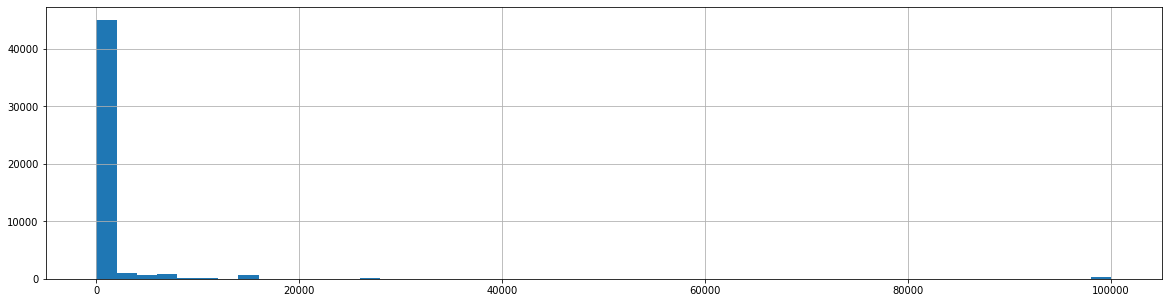

In [118]:
# inspecter la colonne gain en capitaux
data['capital gain'].hist(bins = 50)
data['capital gain'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital loss, dtype: float64

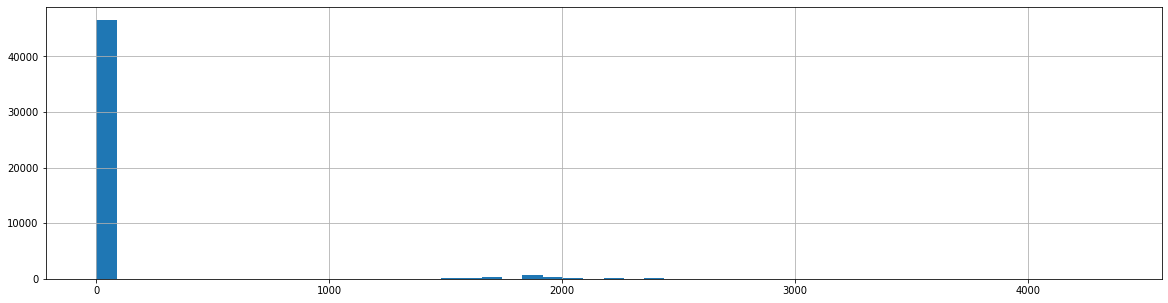

In [119]:
# inspecter la colonne perte en capitaux
data['capital loss'].hist(bins = 50)
data['capital loss'].describe()

In [120]:
# regrouper les donnees de gain/perte en capitaux
bins = list(range(0,100001,2000))
data['cp gain binned'] = pd.cut(data['capital gain'], bins)
data['cp loss binned'] = pd.cut(data['capital loss'], bins)

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours weekly, dtype: float64

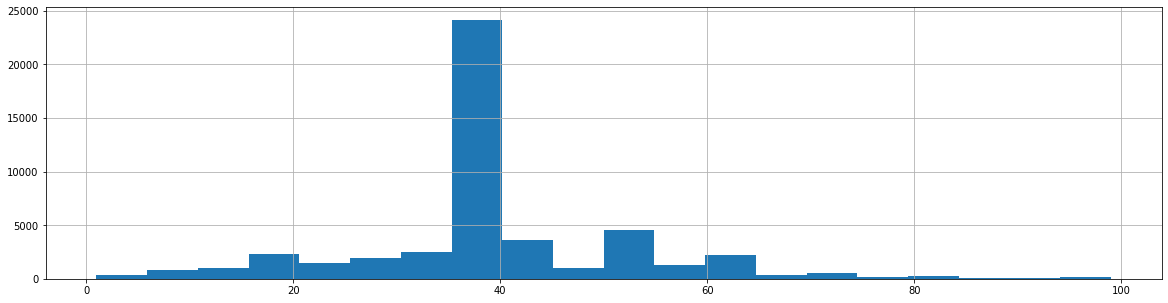

In [121]:
# inspecter la colonne heures de travail
data['hours weekly'].hist(bins = 20)
data['hours weekly'].describe()

In [122]:
# regrouper les donnees de gain/perte en capitaux
bins = list(range(0,101,5))
data['hours weekly binned'] = pd.cut(data['hours weekly'], bins)

In [124]:
# uniformiser la colonne de salaire
data['yearly salary'][data['yearly salary'] ==  '<=50K.'] = '<=50K'
data['yearly salary'][data['yearly salary'] ==  '>50K.'] = '>50K'

C:\Users\draby\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\draby\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
# se debarasser des colonnes inutiles
data = data.drop(labels=['age','weight','capital gain','capital loss','hours weekly','education years'], axis=1)

In [126]:
# transformer toutes les colonnes en string
data[['age binned','weight binned','cp gain binned','cp loss binned','hours weekly binned']] = data[['age binned','weight binned','cp gain binned','cp loss binned','hours weekly binned']].astype(str)

In [128]:
# identifier les donnees manquantes
data['cp gain binned'][data['cp gain binned'] == 'nan']  = np.NaN
data['cp loss binned'][data['cp loss binned'] == 'nan'] = np.NaN
data.occupation[data.occupation == '?'] = np.NaN
data.workclass[data.workclass == '?'] = np.NaN

In [129]:
data

,workclass,education,marital status,occupation,relationship,race,sex,native country,yearly salary,age binned,weight binned,cp gain binned,cp loss binned,hours weekly binned
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,"(35, 40]","(0, 100000]","(2000.0, 4000.0]",NaN,"(35, 40]"
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,"(45, 50]","(0, 100000]",NaN,NaN,"(10, 15]"
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,"(35, 40]","(200000, 300000]",NaN,NaN,"(35, 40]"
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,"(50, 55]","(200000, 300000]",NaN,NaN,"(35, 40]"
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,"(25, 30]","(300000, 400000]",NaN,NaN,"(35, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K,"(35, 40]","(200000, 300000]",NaN,NaN,"(35, 40]"
16278,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,<=50K,"(60, 65]","(300000, 400000]",NaN,NaN,"(35, 40]"
16279,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,"(35, 40]","(300000, 400000]",NaN,NaN,"(45, 50]"
16280,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K,"(40, 45]","(0, 100000]","(4000.0, 6000.0]",NaN,"(35, 40]"


# Algorithme A-priori

In [130]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules 

In [132]:
# faire une encodage hot one de nos donnees
data_onehot = pd.get_dummies(data)

In [ ]:
# utiliser la methode a priori afin de calculer les ensembles d'items les plus frequents
frq_items = apriori(data_onehot, min_support = 0.02, use_colnames = True) 

In [171]:
# calculer les regles d'association sur les ensembles d'items les plus frequents
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 

In [308]:
# calculer l'entropie conditionnelle entre chaque paire de colonnes
from pyitlib import discrete_random_variable as drv
entropy = drv.entropy_conditional(data.T)
#entropy = drv.entropy_conditional(data_onehot.astype('str').T)

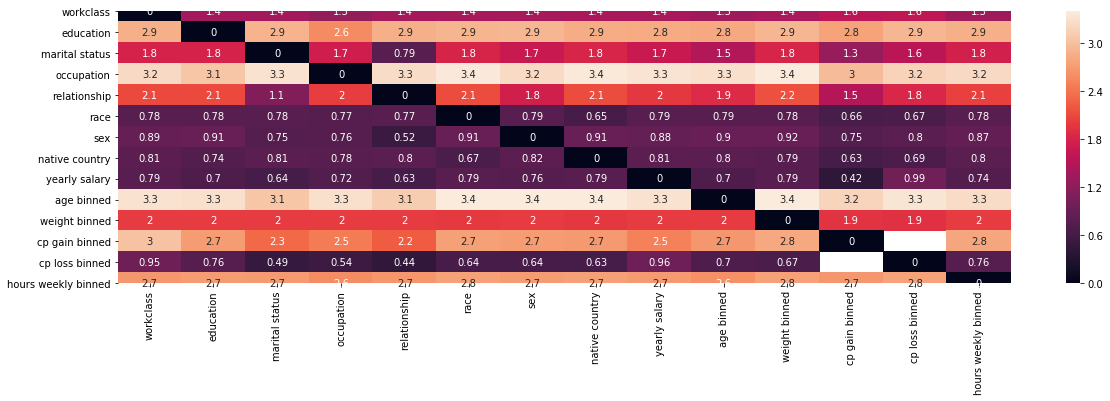

In [310]:
# visualiser l'entropie conditionnelle entre chaque paire de colonnes
plt.rcParams["figure.figsize"] = (20,5)
import seaborn as sns
sns.heatmap(entropy, square = False, xticklabels = data.columns , yticklabels = data.columns, annot=True)

In [311]:
# creer un dataframe avec les mesures d'entropie
entropy_df = pd.DataFrame(entropy, index=data.columns, columns=data.columns)
#entropy_df = pd.DataFrame(entropy, index=data_onehot.columns, columns=data_onehot.columns)

In [315]:
entropy_df.describe()

,workclass,education,marital status,occupation,relationship,race,sex,native country,yearly salary,age binned,weight binned,cp gain binned,cp loss binned,hours weekly binned
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,14.000000
mean,1.804962,1.639892,1.590054,1.539737,1.537594,1.824382,1.774466,1.813474,1.802029,1.573923,1.758884,1.569090,1.714606,1.664476
std,1.101837,1.034990,1.098584,0.983050,1.124511,1.111867,1.089241,1.102877,1.038979,0.993321,1.139914,1.069864,1.076145,1.066395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.830749,0.765504,0.760257,0.761964,0.664105,0.816128,0.793991,0.817372,0.900486,0.794889,0.792099,0.659159,0.796764,0.787894
50%,1.903449,1.586447,1.245676,1.501233,1.089357,1.908498,1.718531,1.906388,1.834167,1.414283,1.624167,1.512720,1.606243,1.551937
75%,2.827443,2.558454,2.606665,2.354917,2.558831,2.749786,2.714533,2.733452,2.656448,2.469665,2.794904,2.680993,2.762421,2.612644
max,3.317102,3.293318,3.313853,3.295467,3.265555,3.399266,3.390948,3.387977,3.324030,3.293303,3.393757,3.196263,3.340885,3.261962


In [314]:
# calculer l'entropie conditionnelle (par paire de valeurs antecedentes vs consequentes) pour chaque ensemble d'items

column_entropy_mean = []
column_entropy_max = []
column_entropy_min = []

for index, row in rules.iterrows():
    #print(row.antecedents, " ", row.consequents, '\n')
    max_entropy = 0
    min_entropy = 100
    sum_entropy = 0
    count = 0
    
    for ant in row.antecedents:
        for cons in row.consequents:
            antecedent = ant.split('_')[0]
            consequent = cons.split('_')[0]
            #antecedent = ant
            #consequent = cons
            
            sum_entropy += entropy_df.loc[antecedent, consequent]
            count +=1
            
            if entropy_df.loc[antecedent, consequent] > max_entropy:
                max_entropy = entropy_df.loc[antecedent, consequent]
            if entropy_df.loc[antecedent, consequent] < min_entropy:
                min_entropy = entropy_df.loc[antecedent, consequent]
    
    mean_entropy = sum_entropy/count
    
    column_entropy_mean.append(mean_entropy)
    column_entropy_max.append(max_entropy)
    column_entropy_min.append(min_entropy)

In [316]:
# ajouter les colonnes d'entropie aux regles d'associations
rules['mean cond entropy'] = column_entropy_mean
rules['max cond entropy'] = column_entropy_max
rules['min cond entropy'] = column_entropy_min

In [317]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mean cond entropy,max cond entropy,min cond entropy
count,265496.000000,265496.000000,265496.000000,265496.000000,265496.000000,2.654960e+05,2.654960e+05,265496.000000,265496.000000,265496.000000
mean,0.223301,0.223301,0.036452,0.334094,1.674554,1.102475e-02,inf,1.560965,2.338916,0.907855
std,0.212036,0.212036,0.026364,0.277148,0.760070,1.096043e-02,NaN,0.529804,0.787994,0.522668
min,0.020003,0.020003,0.020003,0.022290,1.000002,5.281821e-08,1.000000e+00,0.442463,0.442463,0.442463
25%,0.065476,0.065476,0.022952,0.106255,1.130909,3.770405e-03,1.025086e+00,1.191737,1.831974,0.646726
50%,0.138876,0.138876,0.028172,0.240220,1.426599,8.992293e-03,1.086401e+00,1.515139,2.152078,0.754621
75%,0.323164,0.323164,0.039351,0.484894,2.123302,1.463376e-02,1.302778e+00,1.854417,2.923435,0.803341
max,0.897424,0.897424,0.788113,1.000000,20.554757,2.389417e-01,inf,3.399266,3.399266,3.399266


In [344]:
# filtrer les regles d'association afin de maximiser l'entropie et la conviction (i.e. le degre estime de dependance entre le
# consequant et l'antecedant)
top_rules = rules[rules['max cond entropy'] > 2][rules['min cond entropy'] > 2][rules['conviction'] > 5]

C:\Users\draby\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [399]:
# visualiser les regles ayant une surprise et une dependance entre le consequant et l'antecedant les plus eleves
top = top_rules.sort_values(['conviction','max cond entropy'], ascending =[False, False])
top

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mean cond entropy,max cond entropy,min cond entropy
3737,"(education_HS-grad, age binned_(15, 20])",(yearly salary_<=50K),0.020536,0.760718,0.020536,1.000000,1.314547,0.004914,inf,3.073775,3.308949,2.838601
9309,"(weight binned_(100000, 200000], age binned_(1...",(yearly salary_<=50K),0.029360,0.760718,0.029340,0.999303,1.313630,0.007005,343.130052,2.663096,3.308949,2.017243
4346,"(education_Some-college, age binned_(15, 20])",(yearly salary_<=50K),0.026657,0.760718,0.026637,0.999232,1.313538,0.006358,311.544859,3.073775,3.308949,2.838601
9312,"(hours weekly binned_(35, 40], age binned_(15,...",(yearly salary_<=50K),0.020658,0.760718,0.020638,0.999009,1.313244,0.004923,241.435302,3.008060,3.308949,2.707171
711,"(age binned_(15, 20])",(yearly salary_<=50K),0.074178,0.760718,0.074096,0.998896,1.313096,0.017668,216.729459,3.308949,3.308949,3.308949
4024,"(education_Some-college, age binned_(15, 20])",(marital status_Never-married),0.026657,0.329982,0.026125,0.980031,2.969949,0.017329,33.552420,2.977283,3.058183,2.896383
27015,"(education_Some-college, age binned_(15, 20])","(marital status_Never-married, yearly salary_<...",0.026657,0.314975,0.026105,0.979263,3.109019,0.017708,33.033437,3.025529,3.308949,2.838601
26068,"(hours weekly binned_(35, 40], education_HS-gr...",(yearly salary_<=50K),0.022378,0.760718,0.022112,0.988106,1.298912,0.005089,20.118075,2.951574,3.308949,2.707171
35663,"(weight binned_(100000, 200000], age binned_(1...","(marital status_Never-married, yearly salary_<...",0.029360,0.314975,0.028316,0.964435,3.061944,0.019068,19.261296,2.599708,3.308949,2.014458
5983,"(weight binned_(100000, 200000], age binned_(1...",(marital status_Never-married),0.029360,0.329982,0.028336,0.965132,2.924800,0.018648,19.216105,2.536321,3.058183,2.014458


In [402]:
# les regles les plus pertinentes
top.loc[[711,4024,26068,339,3741,4352,89280,713,6298,4078,4099,89092,26834,384,480,3410,416,3125],:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,mean cond entropy,max cond entropy,min cond entropy
711,"(age binned_(15, 20])",(yearly salary_<=50K),0.074178,0.760718,0.074096,0.998896,1.313096,0.017668,216.729459,3.308949,3.308949,3.308949
4024,"(education_Some-college, age binned_(15, 20])",(marital status_Never-married),0.026657,0.329982,0.026125,0.980031,2.969949,0.017329,33.552420,2.977283,3.058183,2.896383
26068,"(hours weekly binned_(35, 40], education_HS-gr...",(yearly salary_<=50K),0.022378,0.760718,0.022112,0.988106,1.298912,0.005089,20.118075,2.951574,3.308949,2.707171
339,"(age binned_(15, 20])",(marital status_Never-married),0.074178,0.329982,0.071332,0.961634,2.914198,0.046855,17.463840,3.058183,3.058183,3.058183
3741,"(education_HS-grad, age binned_(20, 25])",(yearly salary_<=50K),0.037550,0.760718,0.036874,0.982007,1.290894,0.008309,13.298265,3.073775,3.308949,2.838601
4352,"(education_Some-college, age binned_(20, 25])",(yearly salary_<=50K),0.041419,0.760718,0.040457,0.976767,1.284007,0.008949,10.299298,3.073775,3.308949,2.838601
89280,"(education_Some-college, age binned_(15, 20])","(marital status_Never-married, native country_...",0.026657,0.282933,0.024692,0.926267,3.273808,0.017150,9.725225,3.057046,3.387977,2.838601
713,"(age binned_(20, 25])",(yearly salary_<=50K),0.122927,0.760718,0.119549,0.972518,1.278421,0.026036,8.706956,3.308949,3.308949,3.308949
6298,"(occupation_Craft-repair, age binned_(30, 35])",(sex_Male),0.021068,0.668482,0.020167,0.957240,1.431961,0.006084,7.752999,3.317250,3.390948,3.243552
4078,"(occupation_Craft-repair, education_Some-college)",(sex_Male),0.025757,0.668482,0.024467,0.949921,1.421011,0.007249,6.619835,3.083830,3.243552,2.924107


In [409]:
num = 89280

In [410]:
rules.loc[num,:].antecedents

frozenset({'age binned_(15, 20]', 'education_Some-college'})

In [411]:
rules.loc[num,:].consequents

frozenset({'marital status_Never-married',
           'native country_United-States',
           'yearly salary_<=50K'})